# Exercise 3$^+$  Slopes & Integrals

In oceanography, the governing equations include derivatives and integrals. If we are interested in transport $T$, for instance, the definition is the area integral of velocity $v$ through that
area $A$, or

$$T\equiv \int_{A} v\, \mathrm{d}A\ .$$

If instead we are interested in geostrophic velocities, we had from surface variations that velocity could
be determined as

$$v_g = \frac{g}{f}\frac{d\eta}{dx}\ ,$$

where $g$ is gravitational acceleration, $f$ is the Coriolis parameter, $\eta$ is sea surface height anomaly, and $x$ the zonal direction. Here, you’ll use the Gibbs Seawater toolbox to calculate profiles of velocity from hydrographic sections.

**Aim:**  You will calculate transport by integrating velocities across an area, and velocities by calculating the derivative in sea surface height.

**Data:** You will need to download files from [CCHDO](https://cchdo.ucsd.edu/cruise/740H20200119).  You will need the "A05" section for **one** of 1992, 2004, 2010 or 2020.  You want the CTD data in CF format.

**Directions:** Create an `*.ipynb` and some figures.

<hr>

## Create a notebook 

1. Create an `*.ipynb` containing the commands for this assignment, or copy this file.  
    
    ```{admonition} File naming convention
    Name your python notebook something useful `ex<X>-<Lastname>-<slug>-seaocn.ipynb` where you replace `<X>` with the exercise number and `<slug>` with the short slug to name the topic, and `<Lastname>` with your last name.

    Figures should be named something like `ex<X>fig<Y>-<Lastname>-<slug>-seaocn.png` where you replace `<X>` with the exercise number, `<Y>` with the figure number, and `<Lastname>` with your last name.
    ```

2. Import necessary packages.  



    For example, `matplotlib` and `pandas` and `numpy` and `xarray`.  You may also need
    ```{python}
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import xarray as xr
    import gsw 
    from datetime import datetime
    ```
    If you are missing any of these packages, please refer to [Resources: Python](../resource/python).



In [1]:
# Your code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

# Some extra colormaps
import cmocean

# Fancy but non-intuitive
import pygmt


### Downloading data

3. Download some data.  First decide what year you'd like to work with.  The data are under 10mb so *could* be stored and shared on the gitlab `data/` folder.

4. Load the data.  Make a basic exploration. How big are the data?  What are the coordinates?  


In [2]:
# Your code here
file_path = '../data/'
filename = '740H20200119_ctd.nc'

fname = file_path + filename
tmp = xr.open_dataset(fname)
print(tmp)

<xarray.Dataset>
Dimensions:             (N_PROF: 134, N_LEVELS: 3297)
Coordinates:
    expocode            (N_PROF) object ...
    station             (N_PROF) object ...
    cast                (N_PROF) int32 ...
    sample              (N_PROF, N_LEVELS) object ...
    time                (N_PROF) datetime64[ns] ...
    latitude            (N_PROF) float64 ...
    longitude           (N_PROF) float64 ...
    pressure            (N_PROF, N_LEVELS) float64 ...
Dimensions without coordinates: N_PROF, N_LEVELS
Data variables:
    section_id          (N_PROF) object ...
    btm_depth           (N_PROF) float64 ...
    pressure_qc         (N_PROF, N_LEVELS) float32 ...
    ctd_temperature     (N_PROF, N_LEVELS) float64 ...
    ctd_temperature_qc  (N_PROF, N_LEVELS) float32 ...
    ctd_salinity        (N_PROF, N_LEVELS) float64 ...
    ctd_salinity_qc     (N_PROF, N_LEVELS) float32 ...
    ctd_oxygen          (N_PROF, N_LEVELS) float64 ...
    ctd_oxygen_qc       (N_PROF, N_LEVELS) float32

## Fig 1. Map the data

- Create a figure that shows where the station locations are.

- Add coastlines.

- Use a sensible projection.  Mercator is OK here.

- Save the figure using the file-naming convention.


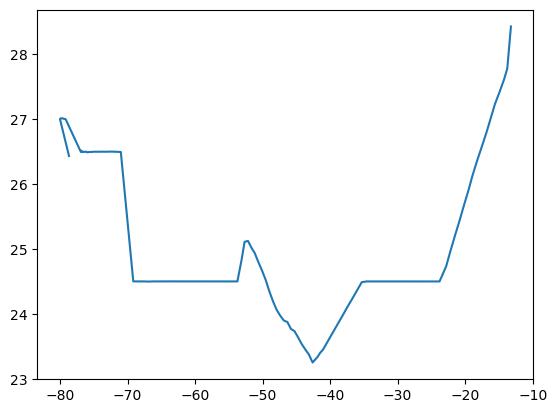

In [3]:
# Your code here
plt.plot(tmp.longitude,tmp.latitude)

## Fig 2.  Plot a section of T and S

1. What format are the data in the dataset?  Use the attributes in the meta data of the file to help you, and scour 

```{seealso}
Some details about the `CF-1.8 CCHDO-1.0` convention: [https://data.pmel.noaa.gov/generic/erddap/info/cchdo_bottle/index.html](https://data.pmel.noaa.gov/generic/erddap/info/cchdo_bottle/index.html)
```

2. If necessary, calculate absolute salinity and conservative temperature using the `gsw` toolbox.

3. Plot the section data (either conservative temperature or absolute salinity).  Try `matplotlib.pyplot.pcolormesh` or `~.contour` options for plotting.

4. Experiment with a colorbar from `cmocean`.

    ```{seealso}
    - `cmocean` for some decent colormaps in python: [https://matplotlib.org/cmocean/](https://matplotlib.org/cmocean/)
    - I prefer colorbrewer, which is also available for python: [https://github.com/dsc/colorbrewer-python](https://github.com/dsc/colorbrewer-python)
    ```

## Fig 3. Calculate geostrophic velocities


```{seealso}
http://oceanworld.tamu.edu/resources/ocng_textbook/chapter10/chapter10_04.htm for more information.
```

For vertical profiles of seawater density, we calculate the dynamic height anomaly (also known as geopotential anomaly) in m$^2$s$^{-2}$ as

```{python}
geo_gstrf1 = gsw.geo_strf_dyn_height(SA1, CT1, p1, p_ref)
```

where `SA1` and `CT1` are the salinity and temperature (TEOS-10) definition, `p1` is the pressure vector, and `p_ref` the reference depth (could be 0).  In equations, this is calculating

$$\Phi = -\int_{p_ref}^{p}\delta(S_A,\theta,p')\, dp'$$

where $\Phi$ is the dynamic height anomaly and $\delta$ is the specific volume anomaly (sometimes also denoted by $\alpha$).  Between different locations or stations, we calculate geostrophic velocity.  Using the `gsw` toolbox, this is executed as,

```{python}
[geovel, midlat, midlong] = gsw.geostrophic_velocity(...)
```

This creates a velocity profile at the mid-point location between the two original stations, where the velocity is zero at the level-of-no-motion (at $p_{ref}$).  In equations, this is estimating:

$$f(v-v_{ref}) = g\frac{d\Phi}{dx}\ .$$

1. Extract the profiles of absolute salinity and conservative temperature closest to the longitudes
76.75$^\circ$W and 76.5$^\circ$W. Call them station 1 and station 2, respectively.

2. Calculate the dynamic height relative to 1000 dbar as your reference level.

3. Calculate the geostrophic velocities referenced to 1000 dbar.

4. Create a figure with the dynamic height profiles as a function of depth (or pressure) on the left, and the velocity profile as a function of depth (or pressure) on the right.

```{hint}
There is a `gsw` function to convert between pressure and depth.
```


In [4]:
# Your code here

## Fig 4. Integrate velocities to estimate transport.

1. Calculate the distance between the two stations above using the distance function in the `gsw`.

2. Use the distance between the two stations and water depths, to turn the velocity profile calculated above into a transport estimate. What is the net northward transport?

3. What is the transport in units of Sverdrups, where 1 Sv = 10$^6$ m$^3$s$^{−1}$.

4. Repeat the geostrophic velocity calculation between all station pairs from 76.75$^\circ$W and 76.5$^\circ$W (so between the station closest to 76.75◦W and the next adjacent to the east, then between that next station, and the one a little bit further east, etc.).

5. Integrate the velocities in the zonal direction to create a transport-per-unit-depth profile. Look for a function that will perform a "trapezoidal integration".  For a distance vector given by $x$ and a velocity matrix $v$ which has one dimension corresponding to horizontal distances $x$ and another to depth, $z$, the zonal-integral of a velocity section
can be calculated using `numpy.trapz` as

```{python}
td = trapz(x, v)
```

6. Create a figure with the transport-per-unit-depth in the left panel.

7. Integrate the transport-per-unit-depth profile over the first 1000m of depth only.  What is the net northward transport in the top 1000m?

8. (Optional:) You can calculate the overturning streamfunction by *accumulating* in the vertical rather than integrating.  This leaves you with a profile that still has a depth-dependence.  In python, this can be accomplished with

```{python}
scipy.integrate.cumulative_trapezoid
```

In [5]:
# Your code here